In [2]:
# 3개층의 신경망으로 MNIST 데이터를 학습하는 코드

import numpy
# 시그모이드 함수 expit() 사용을 위해 scipy.specail 불러오기
import scipy.special
# 행렬을 시각화하기 위한 라이브러리
import matplotlib.pyplot
# 시각화가 외부 윈도우가 아닌 현재의 노트북내에서 보이도록 설정
%matplotlib inline

In [3]:
# 신경망 클래스의 정의
class neuralNetwork:
    # 신경망 초기화하기
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # 입력, 은닉, 출력 계층의 개수 설정
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # 가중치 행렬 wih와 who
        # 배열 내 가중치는 w_i_j로 표기, 노드 i에서 다음 계층의 노드 j로 연결됨을 의미
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        # 학습률
        self.lr = learningrate
        
        # 활성화 함수로는 시그모이드 함수를 이용
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass
    
    # 신경망 학습시키기
    def train(self, inputs_list, targets_list):
        # 입력 리스트 2차원의 행렬로 변환
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # 은닉 계층으로 들어오는 신호를 계산
        hidden_inputs = numpy.dot(self.wih, inputs)
        # 은닉 계층에서 나가는 신로를 계산
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # 최종 출력 계층으로 들어오는 신호를 계산
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # 최종 출력 계층에서 나가는 신호를 계산
        final_outputs = self.activation_function(final_inputs)
        
        # 출력 계층의 오차는 (실제 값 - 계산 값)
        output_errors = targets - final_outputs
        # 은닉 계층의 오차는 가중치에 의해 나뉜 출력 계층의 오차들을 재조합해 
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        # 은닉 계층과 출력 계층 간의 가중치 업데이트
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass
    
    # 신경망에 질의하기
    def query(self, inputs_list):
        # 입력 리스트를 2차원 행렬로 변환
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # 은닉 계층으로 들어오는 신호를 변환
        hidden_inputs = numpy.dot(self.wih, inputs)
        # 은닉 계층에서 나가는 신호를 계산
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # 최종 출력 계층으로 들어오는 신로를 계산
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # 최종 출력 계층에서 나가는 신호를 계산
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [4]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# 학습률은 0.3
learning_rate = 0.3

# 신경망의 인스턴스 생성
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [6]:
# mnist 학습 데이터인 csv 파일을 리스트로 불러오기
training_data_file = open("mnist_train_100.csv", "r")
training_data_list = training_data_file.readlines()
training_data_file.close()

In [7]:
# 신경망 학습시키기

# 학습 데이터 모음 내의 모든 레코드 탐색
for record in training_data_list:
    # 레코드를 쉼표에 의해 분리
    all_values = record.split(",")
    # 입력 값의 범위와 값 조정
    inputs = (numpy.asfarray(all_values[1:])/255.0 * 0.99) + 0.01
    # 결과 값 생성 (실제 값인 0.99 외에는 모두 0.1)
    targets = numpy.zeros(output_nodes) + 0.01
    # all_values[0]은 이 레코드에 대한 결과 값
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)

    pass

In [9]:
# 신경망 테스트 하기

# load the mnist tet data CSV file into a list
test_data_file = open("mnist_test_10.csv", "r")
test_data_list = test_data_file.readlines()
test_data_file.close()

In [10]:
# get the first test record
all_values = test_data_list[0].split(",")
# print the label
print(all_values[0])

7


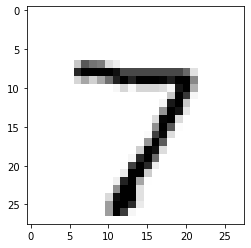

In [11]:
# 픽셀 값들을 이미지로 시각화
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap="Greys", interpolation="None")

In [12]:
# 학습된 신경망에 질의를 해 일련의 숫자를 얻었고 이 숫자들은 각 출력 노드의 결과 값입니다.
n.query((numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

array([[0.09779955],
       [0.00991954],
       [0.02127791],
       [0.05924506],
       [0.05871013],
       [0.06793622],
       [0.00194256],
       [0.93168856],
       [0.01772443],
       [0.04571841]])

In [13]:
scorecard = []

# 테스트 데이터 모음 내의 모든 레코드 탐색
for record in test_data_list:
    # 레코드를 쉼표에 의해 분리
    all_values = record.split(",")
    # 정답은 첫 번째 값
    correct_label = int(all_values[0])
    print(correct_label, "correct label")
    # 입력 값의 범위와 값 조정
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # 신경망에 질의
    outputs = n.query(inputs)
    # 가장 높은 값의 인덱스는 레이블의 인덱스와 일치
    # numpy.argmax() 행렬 내에서 가장 큰 값을 찾아 그 위치를 알려주는 함수
    label = numpy.argmax(outputs)
    print(label, "network's answer")
    # 정답 또는 오답을 리스트에 추가
    if(label == correct_label):
        # 정답인 경우 성적표에 1을 더함
        scorecard.append(1)
    else:
        # 정답이 아닌 경우 성적표에 0을 더함
        scorecard.append(0)
        pass

7 correct label
7 network's answer
2 correct label
0 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
9 correct label
3 network's answer
5 correct label
1 network's answer
9 correct label
7 network's answer


In [14]:
print(scorecard)

[1, 0, 1, 1, 1, 1, 1, 0, 0, 0]


In [15]:
# 정답의 비율인 성적을 계산해 출력
scorecard_array = numpy.asarray(scorecard)
print("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.6
